参考にさせてもらったサイト \
【実践】PythonとBERTで感情分析しようよ！, 趣味や仕事に役立つ初心者DIYプログラミング入門, https://resanaplaza.com/2022/06/12/%E3%80%90%E5%AE%9F%E8%B7%B5%E3%80%91python%E3%81%A8bert%E3%81%A7%E6%84%9F%E6%83%85%E5%88%86%E6%9E%90%E3%81%97%E3%82%88%E3%81%86%E3%82%88%EF%BC%81/, 最終閲覧日2022/12/24

# ライブラリのインストール

In [1]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install transformers[ja]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 33.6 MB/s 
     |████████████████████████████████| 7.6 MB 67.3 MB/s 
     |████████████████████████████████| 182 kB 61.0 MB/s 
     |████████████████████████████████| 47.4 MB 1.7 MB/s 
     |████████████████████████████████| 13.4 MB 58.4 MB/s 
     |████████████████████████████████| 615 kB 72.7 MB/s 
     |████████████████████████████████| 2.2 MB 65.6 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=d8087f5223e1baf3aedf23c3571801163879204ffe83533532997d06543a6a5b
  Stored in directory: /root/.cache/pip/wheels/45/b7/f5/a21e68db846eedcd00d69e37d60bab3f68eb20b1d99cdff652
  Created wheel for sudachidict-core: filename=SudachiDict_core-20221021-py3-none-any.whl size=71574782 sha256=175ba710a1acea2a29a04abb0beac8f1482bf8cb13c811d5d949720e70181b0b
  

In [3]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 28.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=df6911b7c55022665496a561553da35c58d9856c0b1ca9f23487058f66cc44e0
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [11]:
!python --version

Python 3.8.16


In [8]:
print(torch.__version__)

1.13.0+cu116


#クラス定義

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import random
import glob
import json
import pickle
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader
from transformers import BertModel

import codecs
from transformers import pipeline, AutoModelForSequenceClassification, BertJapaneseTokenizer

# 日本語の事前学習モデル
MODEL_NAME = 'daigo/bert-base-japanese-sentiment'
TOKENIZER_NAME = 'cl-tohoku/bert-base-japanese-whole-word-masking'

In [5]:
class SentimentAnalysis:
    def __init__(self):
        """
        コンストラクタ
        """
        model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
        tokenizer = BertJapaneseTokenizer.from_pretrained(TOKENIZER_NAME)
        self.nlp = pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)
        self.document = None

    def analyze(self,text = None):
        '''
        感情分析
        Returns:
        --------
            {'label':str,'score':float}  ネガポジの結果と確率を辞書形式で返す   
       
        '''
        return self.nlp(self.document if text is None else text)

    def read_file(self,filename,encoding='utf-8'):
        '''
        ファイルの読み込み

        Parameters:
        --------
            filename : str　 分析対象のファイル名 
        '''
        with codecs.open(filename,'r',encoding,'ignore') as f:
            self.read_text(f.read())

    def read_text(self,text):
        '''
        テキストの読み込み

        Parameters:
        --------
            text : str  分析対象のテキスト
        '''
        # 形態素解析を用いて名詞のリストを作成
        self.document = text

In [ ]:
# 感情分析の実行
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME) 
tokenizer = BertJapaneseTokenizer.from_pretrained(TOKENIZER_NAME)
nlp = pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)

#テスト
print(nlp('修理に出します。購入して１年ちょっとで壊れてしまいました。残念です。'))

Downloading:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

[{'label': 'ネガティブ', 'score': 0.661259651184082}]


# 感情分析

In [13]:
#インスタンスの作成
sa = SentimentAnalysis()

Downloading:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

In [14]:
sa.analyze('レポート終わらない鬱')

[{'label': 'ネガティブ', 'score': 0.9936859011650085}]

In [43]:
tweetlog = pd.read_pickle('/content/drive/MyDrive/プログラミング/AcademiX/勉強会/Qiita1224/raw_tweetlog_tmp.pkl')
tweetlog

""


In [37]:
lines = [
   'やはり1型のセンサーは素晴らしい画質です。スマホとは比べ物になりません。',
    '悩んで購入しましたが、高いわりに画質がイマイチでした。後悔しています。最悪',
    '小型軽量で電池も長持ちするし、お勧めできる製品です。',
    '購入して１年ちょっとで壊れてしまいました。残念です。修理に出します。',
    'このサイズでAPC-Cセンサー搭載とは驚きです。値段は少し高めですが、満足です'
]

In [38]:
result = [sa.analyze(line)[0]['label'] for line in lines]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


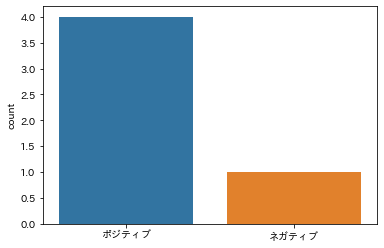

In [39]:
sns.countplot(result)
plt.show()
#plt.savefig('/content/drive/MyDrive/プログラミング/AcademiX/勉強会/Qiita1224/countplot.png')

In [40]:
print('ポジティブな記事数: {}'.format(result.count('ポジティブ')))
print('ネガティブな記事数: {}'.format(result.count('ネガティブ')))

ポジティブな記事数: 4
ネガティブな記事数: 1
